In [25]:
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import scipy.stats as stats
import matplotlib.cm as cm
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import f_regression
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [26]:
mileage = pd.read_csv('data_reshaped.csv')
gdp=pd.read_csv('GDP.csv')
US_EMP = pd.read_csv('US_EMP_RATE.csv')

In [27]:
US_EMP = US_EMP.iloc[:-1,:]
US_EMP.columns = ['date1','EMP']
US_POP = pd.read_csv('US_POP.csv')
US_POP = US_POP.iloc[:-1,:]
US_POP.columns = ['date2','POP']

In [28]:
len(mileage)==len(gdp)==len(US_EMP)==len(US_POP) == 60

True

In [29]:
data = pd.concat([mileage,gdp,US_EMP,US_POP],axis=1)
data = data.drop(columns = ['DATE','date2','date1','quarter'])
features = data.drop(columns = ['GDP'])

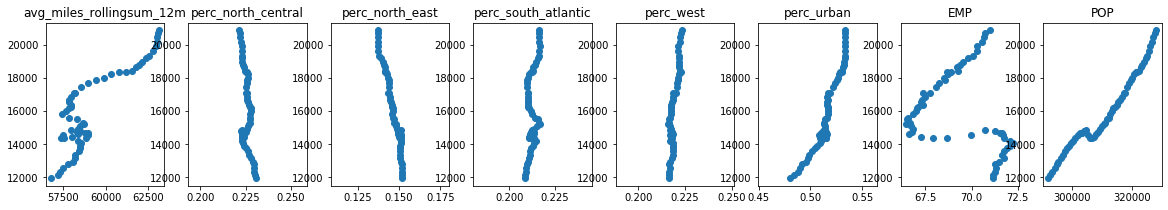

In [30]:
plt.figure(figsize=(20, 3))


for i,col in enumerate(features.columns):
    plt.subplot(1,len(features.columns),i+1)
    plt.scatter(features[col],data.GDP)
    plt.title(col)

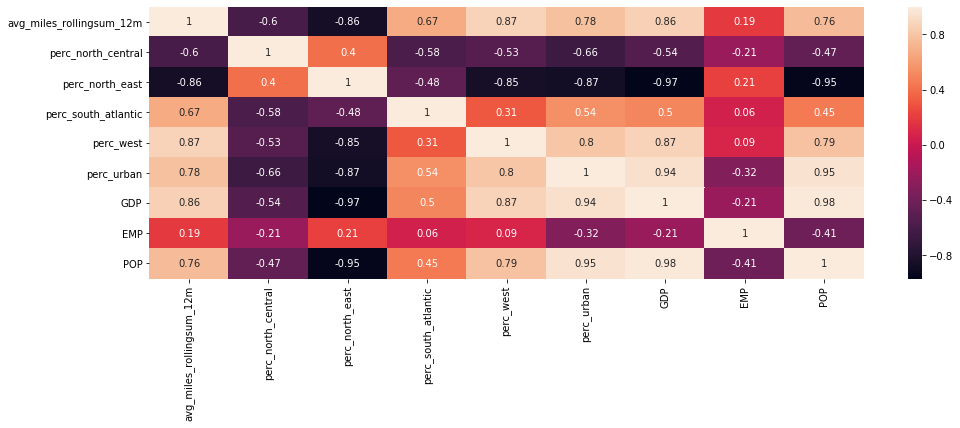

In [31]:
import seaborn as sns
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

In [33]:
reg_M1 = smf.ols('GDP~avg_miles_rollingsum_12m + perc_north_central + \
                perc_north_east + perc_south_atlantic + perc_west + \
                perc_urban + EMP + POP',data=data).fit()
reg_M1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2505.
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           2.26e-63
Time:                        20:17:20   Log-Likelihood:                -372.29
No. Observations:                  60   AIC:                             762.6
Df Residuals:                      51   BIC:                             781.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.011e+05   1.66e+04     -6.075      0.000   -1.34e+05   -6.77e+04
avg_miles_rollingsum_12m    -0.1009      0.048     -2.120      0.039      -0.196      -0.005
perc_north_central        1.061e+04   1.85e+04      0.572      0.570   -2.66e+04    4.78e+04
perc_north_east           5112.3242   3.05e+04      0.168      0.867    -5.6e+04    6.63e+04
perc_south_atlantic       5.525e+04   1.96e+04      2.822      0.007    1.59e+04    9.46e+04
perc_west                 6.735e+04   3.37e+04      1.999      0.051    -303.523    1.35e+05
perc_urban               -1.833e+04   9329.298     -1.964      0.055   -3.71e+04     403.630
EMP                        297.2237     27.069     10.980      0.000     242.880     351.568
POP                          0.2645      0.021     12.881      0.000       0.223       0.306
==============================================================================
Omnibus:                        0.424   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.809   Jarque-Bera (JB):                0.575
Skew:                          -0.159   Prob(JB):                        0.750
Kurtosis:                       2.642   Cond. No.                     8.01e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
features2 = features.drop(columns=['perc_north_east','perc_north_east'])

In [35]:
reg_M2 = smf.ols('GDP~avg_miles_rollingsum_12m + perc_south_atlantic + perc_west + \
                perc_urban + EMP + POP',data=data).fit()

In [36]:
reg_M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3448.
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           7.72e-67
Time:                        20:17:27   Log-Likelihood:                -372.49
No. Observations:                  60   AIC:                             759.0
Df Residuals:                      53   BIC:                             773.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -9.522e+04   7259.016    -13.118      0.000    -1.1e+05   -8.07e+04
avg_miles_rollingsum_12m    -0.0959      0.045     -2.136      0.037      -0.186      -0.006
perc_south_atlantic        5.21e+04   1.79e+04      2.914      0.005    1.62e+04     8.8e+04
perc_west                 6.689e+04   3.24e+04      2.068      0.044    1999.845    1.32e+05
perc_urban               -2.034e+04   5129.333     -3.964      0.000   -3.06e+04      -1e+04
EMP                        288.0799     19.587     14.708      0.000     248.794     327.366
POP                          0.2626      0.008     33.602      0.000       0.247       0.278
==============================================================================
Omnibus:                        1.073   Durbin-Watson:                   0.803
Prob(Omnibus):                  0.585   Jarque-Bera (JB):                1.100
Skew:                          -0.216   Prob(JB):                        0.577
Kurtosis:                       2.497   Cond. No.                     6.99e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
[vif(np.array(features2),i) for i in range(1,len(features2.columns))]

[29003.525591546262,
 18901.71434688995,
 101389.48686298347,
 49777.60035428292,
 7869.024549142253,
 23646.53179038305]

In [38]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(reg_M2.resid, reg_M2.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 12.04268347554496, 'LM-Test p-value': 0.061023334529280264, 'F-Statistic': 2.218160753699983, 'F-Test p-value': 0.05543935852191886}


In [39]:
bg_test=sm.stats.diagnostic.acorr_breusch_godfrey(reg_M2)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bg_test)))

{'LM Statistic': 28.239651583435375, 'LM-Test p-value': 0.0016524026139669256, 'F-Statistic': 3.8233365773028156, 'F-Test p-value': 0.0009555603321952383}


In [40]:
infl = reg_M2.get_influence()

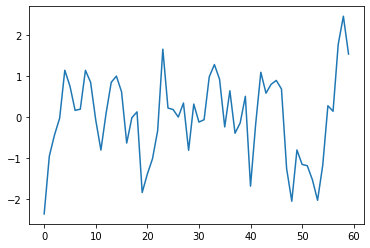

In [41]:
plt.plot(data.index,infl.resid_studentized_external)

In [42]:
n = len(data)
p = len(features2.columns) + 1

In [43]:
inflsum = infl.summary_frame()
reg_dffits=inflsum.dffits
dffits_thresh = 2*np.sqrt((p+1)/(n-p-1))
atyp_dffits = np.abs(reg_dffits) > dffits_thresh
a_dffits_ind = set(data.index[atyp_dffits])
a_dffits_ind

{0, 23, 58}

In [58]:
## F-test : reduced vs full model
## reg_M2 : reduced model (i.e. null hypothesis), reg_M1 : full model (ie alternate hypothesis)
F_stat = ((reg_M2.ssr - reg_M1.ssr) / (reg_M2.df_resid - reg_M1.df_resid) / (reg_M1.ssr / reg_M1.df_resid))
F_stat

0.16600064173028078

In [61]:
## p - value is 0.15 >> 0.05, hence we donot have enough information to reject the null hypothesis 
## hence we accept the reduced model
import scipy.stats as stats
alpha = 0.05
p_value = stats.f.cdf(F_stat, reg_M2.df_resid - reg_M1.df_resid, reg_M1.df_resid)
p_value

0.1524984894387115